# Correlation matrix and PCA

Test to perform the correlation matrix and the associated plots
Likewise do the PCA analysis.
Other statistical tools are tested.

In [1]:
using PyCall
using Distributions, Statistics, Distances , LinearAlgebra, StatsBase
using DataFrames
using Random , Printf, Glob
using MultivariateStats , TSne
import MultivariateStats


import PyPlot , CSV

sns= pyimport("seaborn")

rootdir = ENV["GAIA_ROOT"]

push!(LOAD_PATH,"$rootdir/master/src")
using GaiaClustering

## directory
wdir    = "$rootdir/products"
plotdir = "$rootdir/products/plots"
ocdir= "$wdir/oc2"

cd(wdir)

┌ Info: Precompiling TSne [24678dba-d5e9-5843-a4c6-250288b04835]
└ @ Base loading.jl:1273
┌ Info: Precompiling GaiaClustering [top-level]
└ @ Base loading.jl:1273


## Pearson's correlation

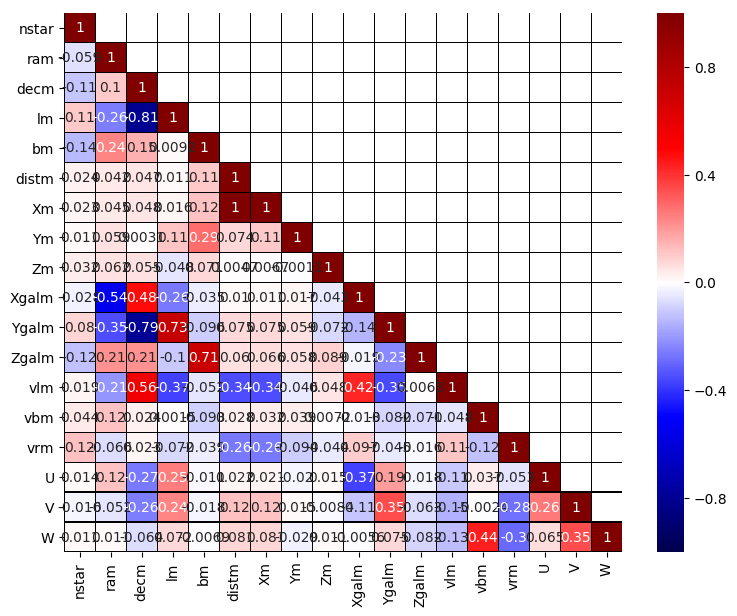

In [2]:
## reading the test file
df= CSV.read("votlist.finalSample_metric0.01-age.MS.csv", delim=";")
df= CSV.read("votlist.finalSample_metric0.01-SCglobal.csv", delim= ";")
colname= names(df); 

#data= rand(20,10)

## Pearson cor
data= convert(Matrix, df[:,2:end])     ## only relevant columns
p= Statistics.cor(data,dims=1)

pm=  UnitLowerTriangular(p)
tm= p .!= pm


## heatmap
fig= PyPlot.figure(figsize=(9,7))
heat_map = sns.heatmap(pm, vmin=-1, vmax=1, annot=true,mask= tm, cmap= "seismic",linewidths=0.1, 
    linecolor="black", xticklabels=colname[2:end], yticklabels=colname[2:end])
PyPlot.show()


## PCA analysis

## Standardization...
###
(16, 403)
## dump...
PCA{Float64}
  mean: Array{Float64}((18,)) [1.377447921371162e-19, 4.502705073972157e-16, 2.314112507903552e-17, 8.182040652944702e-16, -2.203916674193859e-18, 1.2286835458630765e-16, -9.515410240831988e-16, -4.945038037722471e-17, -3.266273383551368e-17, -1.4132891162852395e-14, -6.16407944813595e-17, -4.862391162440202e-17, -4.967938109415267e-16, -1.2689050251671143e-15, -5.840379186613726e-17, -4.1874416809683324e-17, -1.3223500045163155e-17, 1.5427416719357015e-17]
  proj: Array{

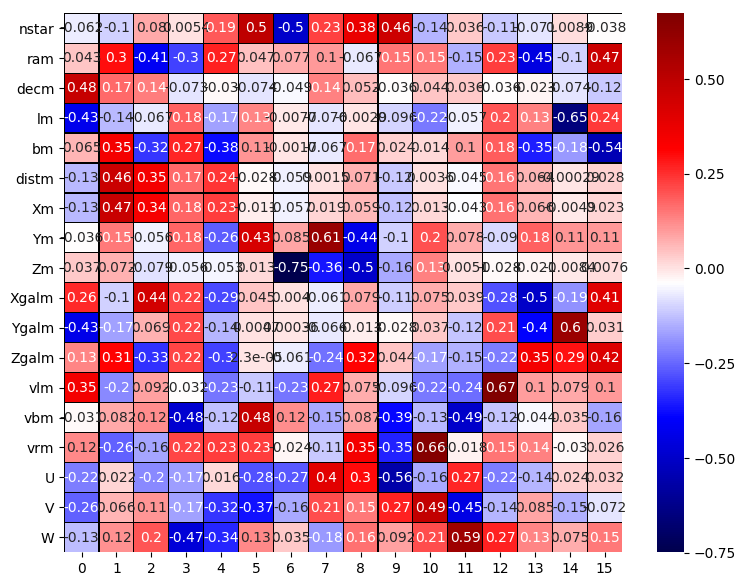

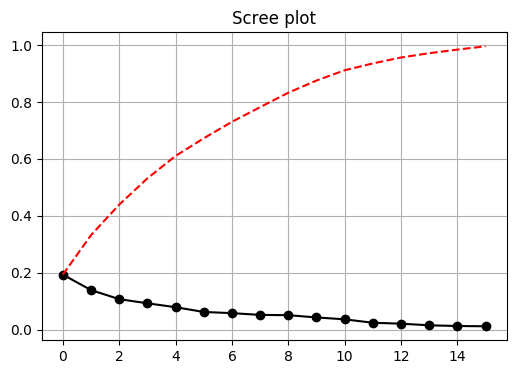

Float64}((18, 16)) [-0.06221549916563522 -0.10037730260199827 … 0.008930081462499066 -0.037651083580533935; 0.04277121455625885 0.2977806281718534 … -0.10430544835469949 0.4662362061277726; … ; -0.25575457563670784 0.06562513795608804 … -0.14627894930288604 -0.07195998950806357; -0.13077001751364428 0.11764851450413973 … 0.07471152235910722 0.14733271231760814]
  prinvars: Array{Float64}((16,)) [3.4791463727620067, 2.499212527324244, 1.9278178906903147, 1.663449488669988, 1.4170804873304854, 1.116569015946373, 1.0414763591305642, 0.9302643362616084, 0.9126542066137586, 0.7690928152844243, 0.6501432957213864, 0.4325325316852284, 0.3755096138929213, 0.27138820450656137, 0.2271664367931022, 0.2104217812860355]
  tprinvar: Float64 17.923925363899002
  tvar: Float64 17.999999999999993


In [3]:
d=copy(data')
println("## Standardization...")
dt= StatsBase.fit(ZScoreTransform, d)
d2= StatsBase.transform(dt, d)


println("###")
M = fit(PCA, d2; maxoutdim=20)  ## note transposition of data
# apply PCA model to testing set
Yte = transform(M, d2)
println(size(Yte))
Xr = reconstruct(M, Yte)


# println(M.proj) ## projection matrix


println("## dump...")
dump(M)
totvar= tvar(M)  ## total variance
pvs= principalvars(M)

fig= PyPlot.figure(figsize=(9,7))
heat_map = sns.heatmap(M.proj, annot=true, cmap= "seismic",linewidths=0.1, 
    linecolor="black", yticklabels=colname[2:end])
PyPlot.show()

fig= PyPlot.figure(figsize=(6,4))
PyPlot.grid("on")
PyPlot.title("Scree plot")
PyPlot.plot(pvs ./ totvar,"k-")
PyPlot.plot(pvs ./ totvar,"ko")
PyPlot.plot(accumulate(+, pvs ./ totvar), "r--")
PyPlot.show()


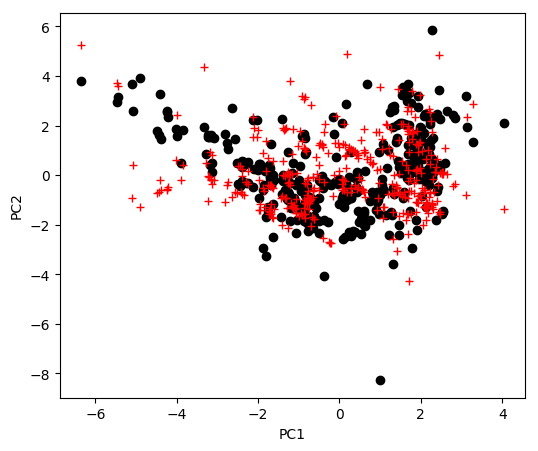

In [4]:
fig= PyPlot.figure(figsize=(6,5))
PyPlot.xlabel("PC1") 
PyPlot.ylabel("PC2") 
PyPlot.plot(Yte[1,:],Yte[2,:],"ko")
PyPlot.plot(Yte[1,:],Yte[3,:],"r+")
PyPlot.show()

t-SNE on PCA

Computing t-SNE 10%|███▊                                |  ETA: 0:00:01
4m  KL_divergence:  3.0590 (warmup)
Computing t-SNE 20%|███████▍                            |  ETA: 0:00:01
4m  KL_divergence:  2.8769 (warmup)
Computing t-SNE 29%|██████████▍                         |  ETA: 0:00:01
4m  KL_divergence:  3.0421
Computing t-SNE 33%|███████████▉                        |  ETA: 0:00:01
4m  KL_divergence:  2.2065
Computing t-SNE 42%|███████████████                     |  ETA: 0:00:01
4m  KL_divergence:  0.6595
Computing t-SNE 51%|██████████████████▍                 |  ETA: 0:00:01
4m  KL_divergence:  0.5205
Computing t-SNE 60%|█████████████████████▋              |  ETA: 0:00:00
4m  KL_divergence:  0.5004
Computing t-SNE 69%|█████████████████████████           |  ETA: 0:00:00
4m  KL_divergence:  0.4961
Computing t-SNE 78%|████████████████████████████▎       |  ETA: 0:00:00
4m  KL_divergence:  0.4935
Computing t-SNE 87%|███████████████████████████████▍    |  ETA: 0:00:00
4m  KL_divergence: 

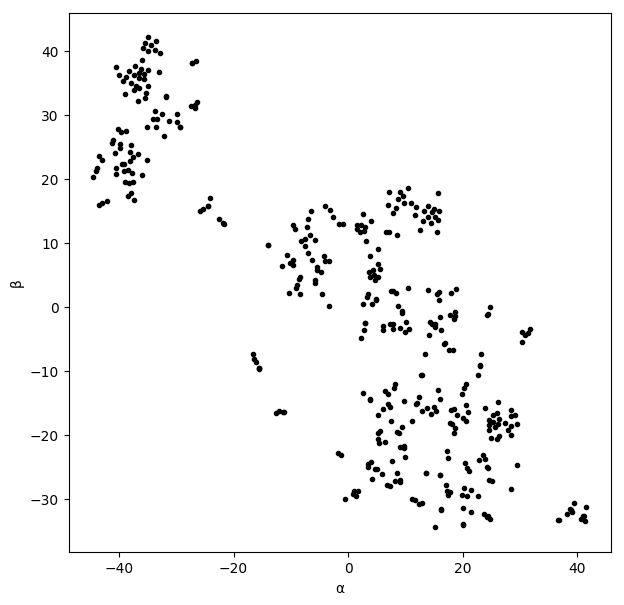


Computing t-SNE 96%|██████████████████████████████████▋ |  ETA: 0:00:00
  KL_divergence:  0.4832
Computing t-SNE100%|████████████████████████████████████| Time: 0:00:01
  KL_divergence:  0.4828


In [11]:
Y = tsne(Yte', 2, 50, 1000, 20.0)


fig= PyPlot.figure(figsize=(7,7))
PyPlot.xlabel("α") 
PyPlot.ylabel("β") 
PyPlot.plot(Y[:,1],Y[:,2],"k.")
PyPlot.show()